In [81]:
using Plots
using Random
using LinearAlgebra

# Parameters of the Model
v0 = 0.03 # Speed of particles
eta = 0.05 # Noise parameter, range: 0 to 1
L = 10.0   # Length of Box
N = 400   # Number of particles
R = 1  # Interaction radius
dt = 1.0   # Time step
Nf = 1000 # Number of time steps
Random.seed!()   # Seed of random number generator

# Particle positions and velocities initialization
xp = rand(N) * L
yp = rand(N) * L
theta = 2 * π * rand(N)
vx = v0 * cos.(theta)
vy = v0 * sin.(theta)

# Function to calculate the adjacency matrix
function adjacency_matrix(xp, yp, R)
    N = length(xp)
    adj_matrix = zeros(Int, N, N)
    for i in 1:N
        for j in 1:N
            if i != j && norm([xp[i] - xp[j], yp[i] - yp[j]]) <= R
                adj_matrix[i, j] = 1
            elseif i == j
                adj_matrix[i,j]=1
            end
        end
    end
    return adj_matrix
end

# Function to apply customized periodic boundary conditions
function apply_periodic_boundary!(x, L)
    for i in 1:length(x)
        if x[i] >= 0
            x[i] = x[i] % L
        else
            while x[i] < 0
                x[i] += L
            end
        end
    end
end


# Initialize an array to store the largest eigenvalues
largest_eigenvalues = Float64[]

# Animation function
function animate(i)
    global xp, yp, theta, vx, vy

    # Move particles and apply periodic BCs
    xp .+= vx * dt
    yp .+= vy * dt
    apply_periodic_boundary!(xp, L)
    apply_periodic_boundary!(yp, L)

    
    # Calculate the mean angle of neighbors within R
    mean_theta = similar(theta)
    for i in 1:N
        neighbors = ((xp .- xp[i]).^2 .+ (yp .- yp[i]).^2 .< R^2)
        sx = sum(cos.(theta[neighbors]))
        sy = sum(sin.(theta[neighbors]))
        mean_theta[i] = atan(sy, sx)
    end
    
    # Add random noise and update velocities
    theta .= mean_theta .+ eta * (rand(N) .- 0.5) * 2 * π
    vx = v0 * cos.(theta)
    vy = v0 * sin.(theta)
    adj_matrix = adjacency_matrix(xp, yp, R)
   # Compute eigenvalues
    eigenvalues = eigvals(Symmetric(adj_matrix))

    # Check if eigenvalues are real
    if all(isreal, eigenvalues)
        # Store the largest eigenvalue
        push!(largest_eigenvalues, maximum(eigenvalues))
        println("Iteration $i, largest eigenvalue: $(maximum(eigenvalues))")
    else
        println("Non-real eigenvalues encountered at iteration $i")
    end
end
frames=[]
# Create each frame manually
for i in 1:Nf
    animate(i)
    push!(frames, plot(xp, yp, seriestype = :scatter, xlims=(0, L), ylims=(0, L), legend=false))
end
    
    
     

Iteration 1, largest eigenvalue: 16.164412062269363
Iteration 2, largest eigenvalue: 15.989427851988268
Iteration 3, largest eigenvalue: 15.30869004851765
Iteration 4, largest eigenvalue: 15.337045565710309
Iteration 5, largest eigenvalue: 15.408602526128329
Iteration 6, largest eigenvalue: 15.88220810219602
Iteration 7, largest eigenvalue: 15.740382218859551
Iteration 8, largest eigenvalue: 15.797758945208438
Iteration 9, largest eigenvalue: 15.969275962875479
Iteration 10, largest eigenvalue: 16.02111472171421
Iteration 11, largest eigenvalue: 16.109409721919448
Iteration 12, largest eigenvalue: 16.694496745187493
Iteration 13, largest eigenvalue: 16.68062388828974
Iteration 14, largest eigenvalue: 17.442038158202674
Iteration 15, largest eigenvalue: 17.450682045582354
Iteration 16, largest eigenvalue: 17.475579819889816
Iteration 17, largest eigenvalue: 17.478955991123016
Iteration 18, largest eigenvalue: 17.749892538721426
Iteration 19, largest eigenvalue: 17.744923396448897
Iterat

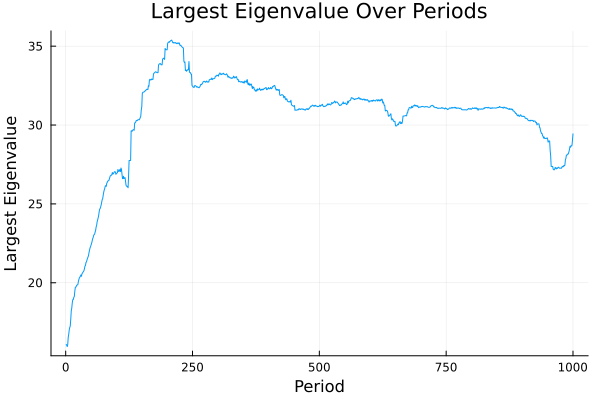

In [78]:
num_periods = length(largest_eigenvalues)
if num_periods == Nf
    periods = 1:num_periods
    plot(periods, largest_eigenvalues, xlabel="Period", ylabel="Largest Eigenvalue", title="Largest Eigenvalue Over Periods", legend=false)
else
    println("Error: The largest_eigenvalues array was not populated correctly. Expected length: $Nf, Actual length: $num_periods")
end

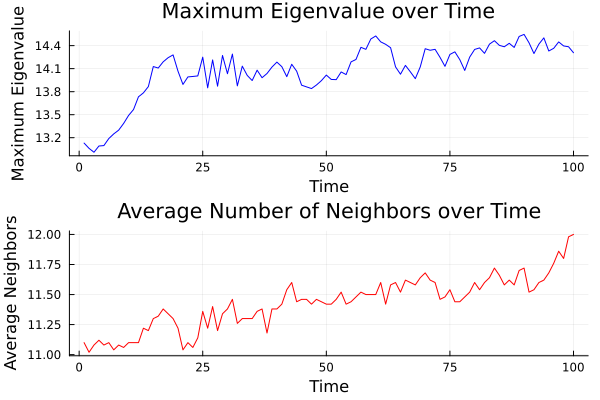

In [34]:
using Plots
using Random
using LinearAlgebra

# Parameters of the Model
v0 = 0.03 # Speed of particles
eta = 0.5 # Noise parameter, range: 0 to 1
L = 10.0   # Length of Box
N = 100    # Number of particles
R = 2      # Interaction radius
dt = 1.0   # Time step
Nf = 100   # Number of time steps, reduced for brevity
Random.seed!() # Seed of random number generator for reproducibility

# Particle positions and velocities initialization
xp = rand(N) * L
yp = rand(N) * L
theta = 2 * π * rand(N)
vx = v0 * cos.(theta)
vy = v0 * sin.(theta)

# Function to calculate the adjacency matrix
function adjacency_matrix(xp, yp, R)
    N = length(xp)
    adj_matrix = zeros(Int, N, N)
    for i in 1:N
        for j = 1:N
            if i != j && norm([xp[i] - xp[j], yp[i] - yp[j]]) <= R
                adj_matrix[i, j] = 1
            end
        end
    end
    return adj_matrix
end

# Function to apply customized periodic boundary conditions
function apply_periodic_boundary!(x, L)
    for i in 1:length(x)
        x[i] = mod(x[i], L)
    end
end

# Initialize storage for the metrics
largest_eigenvalues = Float64[]
average_neighbors = Float64[]

# Animation function
function animate(i)
    global xp, yp, theta, vx, vy

    # Move particles and apply periodic BCs
    xp .+= vx * dt
    yp .+= vy * dt
    apply_periodic_boundary!(xp, L)
    apply_periodic_boundary!(yp, L)
    
    # Calculate the mean angle of neighbors within R and neighbors count
    mean_theta = similar(theta)
    num_neighbors = zeros(Int, N)  # Array to store the number of neighbors
    for i in 1:N
        neighbors = ((xp .- xp[i]).^2 .+ (yp .- yp[i]).^2 .< R^2)
        num_neighbors[i] = sum(neighbors) - 1  # Exclude self
        sx = sum(cos.(theta[neighbors]))
        sy = sum(sin.(theta[neighbors]))
        mean_theta[i] = atan(sy, sx)
    end

    # Calculate and store the average number of neighbors
    avg_neighbors = mean(num_neighbors)
    push!(average_neighbors, avg_neighbors)
    
    # Add random noise and update velocities
    theta .= mean_theta .+ eta * (rand(N) .- 0.5) * 2 * π
    vx = v0 * cos.(theta)
    vy = v0 * sin.(theta)
    adj_matrix = adjacency_matrix(xp, yp, R)
    # Compute eigenvalues
    eigenvalues = eigvals(Symmetric(adj_matrix))

    # Check if eigenvalues are real and store the largest eigenvalue
    if all(isreal, eigenvalues)
        push!(largest_eigenvalues, maximum(eigenvalues))
    end
end

# Run simulation
for i in 1:Nf
    animate(i)
end

# Plotting the results
time_steps = 1:Nf
p1 = plot(time_steps, largest_eigenvalues, title="Maximum Eigenvalue over Time", xlabel="Time", ylabel="Maximum Eigenvalue", legend=false, color="blue")
p2 = plot(time_steps, average_neighbors, title="Average Number of Neighbors over Time", xlabel="Time", ylabel="Average Neighbors", legend=false, color="red")

plot(p1, p2, layout = (2, 1), size = (600, 400))


Radii and their corresponding correlations:
Radius: 0.5, Correlation: 0.7223352005515289
Radius: 0.6, Correlation: 0.6868916794117508
Radius: 0.7, Correlation: 0.6753373301303709
Radius: 0.8, Correlation: 0.4044073867528774
Radius: 0.9, Correlation: 0.46119738255575365
Radius: 1.0, Correlation: 0.8980132172644565
Radius: 1.1, Correlation: 0.67330621537918
Radius: 1.2, Correlation: 0.45471748274639057
Radius: 1.3, Correlation: 0.8579305009027302
Radius: 1.4, Correlation: 0.48881526095440453
Radius: 1.5, Correlation: 0.3510862020044027
Radius: 1.6, Correlation: 0.5662966471231197
Radius: 1.7, Correlation: 0.3613016979170875
Radius: 1.8, Correlation: 0.8589949952174645
Radius: 1.9, Correlation: 0.23495961328084927
Radius: 2.0, Correlation: 0.5693805377354634
Radius: 2.1, Correlation: 0.7095280636099728
Radius: 2.2, Correlation: 0.7230402678395622
Radius: 2.3, Correlation: -0.2726287735360922
Radius: 2.4, Correlation: -0.3740214086470151
Radius: 2.5, Correlation: 0.7110978486664039
Radius:

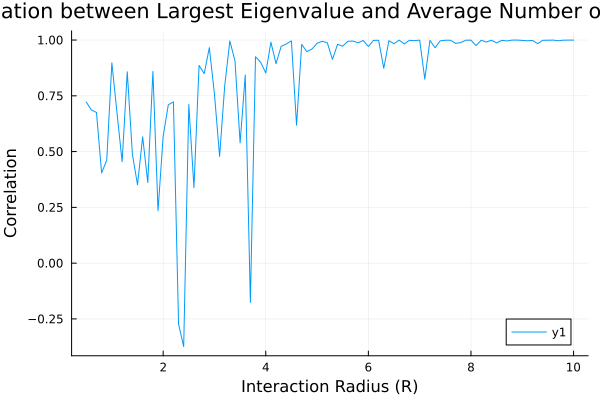

In [42]:
using Plots
using Random
using LinearAlgebra
using Statistics  # For calculating correlation

# Assuming all necessary variables and functions (like adjacency_matrix and apply_periodic_boundary!) are defined elsewhere in the script

# Parameters of the Model
v0 = 0.03  # Speed of particles
eta = 0.5  # Noise parameter, range: 0 to 1
L = 10.0   # Length of Box
N = 100    # Number of particles
R = 2      # Interaction radius
dt = 1.0   # Time step
Nf = 100   # Number of time steps, reduced for brevity
Random.seed!()  # Seed of random number generator for reproducibility

# Updated simulation function that collects all data points for correlation calculation
function simulate(R)
    xp = rand(N) * L
    yp = rand(N) * L
    theta = 2π * rand(N)
    vx = v0 * cos.(theta)
    vy = v0 * sin.(theta)
    
    eigenvalues = Float64[]
    neighbors = Float64[]

    for i in 1:Nf
        xp .+= vx * dt
        yp .+= vy * dt
        apply_periodic_boundary!(xp, L)
        apply_periodic_boundary!(yp, L)

        adj_matrix = adjacency_matrix(xp, yp, R)
        num_neighbors = sum(adj_matrix) - N  # Adjusted to remove diagonal
        eigenvalue = maximum(eigvals(Symmetric(adj_matrix)))

        push!(eigenvalues, eigenvalue)
        push!(neighbors, num_neighbors / N)  # Average number of neighbors per particle
    end

    return eigenvalues, neighbors
end

# Collect and calculate correlations
radii = 0.5:0.1:10
correlations = []

for R in radii
    eigenvalues, neighbors = simulate(R)
    correlation = cor(eigenvalues, neighbors)  # Correctly calculate from full data sets
    push!(correlations, isnan(correlation) ? 0 : correlation)  # Replace NaN with 0
end

# Output for debugging
println("Radii and their corresponding correlations:")
for (radius, corr) in zip(radii, correlations)
    println("Radius: $radius, Correlation: $corr")
end

# Plotting
correlation_plot = plot(radii, correlations, xlabel="Interaction Radius (R)", ylabel="Correlation", title="Correlation between Largest Eigenvalue and Average Number of Neighbors")
display(correlation_plot)
